In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import re
import json
import collections


from util import get_data
from util import mapping
from util import clean_data
from util import config
from util import plot_clusters

import sklearn.cluster
import sklearn.neighbors

In [6]:
df = pd.read_csv(config.PROCESSED_DATA_PATH + 'trips.csv')
df = clean_data.filter_cleaned_trips(df)
print(df.shape)
grid_points, grid_dict = clean_data.load_gridpts('road_backbone_merged', 'grid_rte_ids_merged')

(20877, 5)


In [89]:
grid_pts_fine = pd.read_csv(config.MODEL_PATH + 'road_backbone_merged.csv', index_col=0)
grid_pts_fine.head()

,lat,lon,breadcrumb_count,n_routes
grid_i,,,,
8229794,41.794425,-73.942390,41.0,6
8229795,41.795421,-73.942371,38.0,5
8229797,41.797192,-73.942118,87.0,10
8229798,41.798152,-73.942141,4.0,1
8233794,41.794424,-73.941312,4717.0,134


In [16]:
rte_dict = clean_data.load_rte_pts('rte_dict_fine')

In [33]:
rts_at_grid = []
for k, v in grid_dict.items():
    rts_at_grid += [{'grid_id': k, 'rte_ids': v}]
rts_at_grid = pd.DataFrame(rts_at_grid).set_index('grid_id')
rts_at_grid.to_csv(config.MODEL_PATH + 'rts_at_fine_grid.csv')

In [36]:
rts = []
for k, v in rte_dict.items():
    rts += [{'rte_id': k, 'grid_pts': v}]
rts = pd.DataFrame(rts).set_index('rte_id')
rts.to_csv(config.MODEL_PATH + 'rts_grid_pts.csv')

In [46]:
rts_at_grid.to_csv(config.MODEL_PATH + 'rts_at_fine_grid.csv')

In [86]:
# gp = grid_points.set_index('grid_i')
rts_gridpts = pd.read_csv(config.MODEL_PATH + 'rts_grid_pts.csv', index_col=0)
rts_at_grid = pd.read_csv(config.MODEL_PATH + 'rts_at_fine_grid.csv', index_col=0)

rts_gridpts.grid_pts = rts_gridpts.grid_pts.apply(lambda x: [int(a) for a in x.strip('[]').split(',')])
rts_at_grid.rte_ids = rts_at_grid.rte_ids.apply(lambda x: set([int(a) for a in x.strip('{}').split(',')]))

In [87]:

type(rts_at_grid.loc[8229794].rte_ids)

set

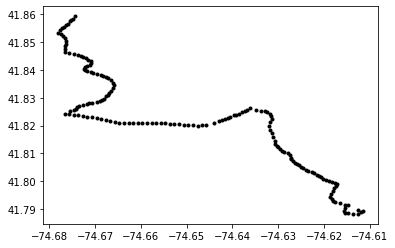

In [88]:
locs = gp.loc[rts.loc[11439445].grid_pts][['lat', 'lon']]
plt.plot(locs.lon, locs.lat, 'k.')